In [6]:
import pandas as pd
import numpy as np
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt

%matplotlib inline

200 семплов


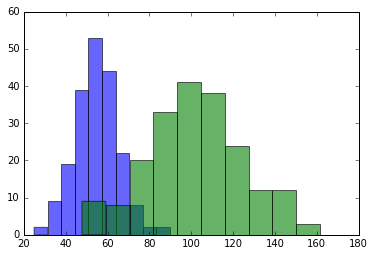

In [17]:
data = pd.read_csv("hw6t3v2.txt", sep=" ", header=None)
X, Y = data[0].values, data[1].values
print X.shape[0], "семплов"
plt.hist(X, alpha=0.6)
plt.hist(Y, alpha=0.6);

Распределение левой выборки похоже на нормальное. У правой же выборки левая часть гистограммы имеет визуальное отклонение от нормального распределения. Также, очевидно, что выборки имеют различные распределения.

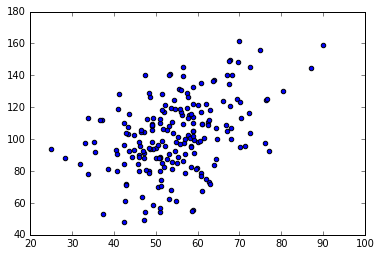

In [14]:
plt.scatter(X, Y);

По графику предполагаю, что выборки зависимы.

Для проверки независимости выборок используем критерий хи-квадрат:

In [22]:
p_values = []
observed = np.histogram2d(X, Y, bins=2)[0]
assert observed.sum(axis=0).min() * observed.sum(axis=1).min() / X.shape[0] >= 5
p_value = sps.chi2_contingency(observed)[1]
p_values.append(p_value)

Для проверки нормальности выборок используем КС-тест:

In [25]:
p_values.append(sps.kstest(X, "norm")[1])
p_values.append(sps.kstest(Y, "norm")[1])

Для проверки однородности используем критерий знаковых рангов Уилкоксона, т.к. предполагаем, что выборки парные:

In [27]:
p_values.append(sps.wilcoxon(X, Y)[1])

Проведём поправку на множественную проверку гипотез. Используем метод Холма, т.к. это мощнейшая из процедур, контролирующих FWER, если характер зависимости между статистиками неизвестен (в нашем случае статистики считаются по одним и тем же выборкам, поэтому они могут быть зависимы).

In [30]:
results = multipletests(p_values, alpha=0.1, method='holm')
print results[0]
print results[1]

[ True  True  True  True]
[  1.90678431e-04   0.00000000e+00   0.00000000e+00   3.19099023e-34]


Как видим, все гипотезы (о нормальности, независимости и однородности) были отклонены на уровне значимости 0.1 (с большим запасом).